# **Assignment 4**
# **By -** 
### *Anuj Singh Negi,* *19BAI10021*
### *Elisha Singh,* *19BAI10043*

# **Importing the Libraries**

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# **Reading the Image**

ORIGINAL IMAGE


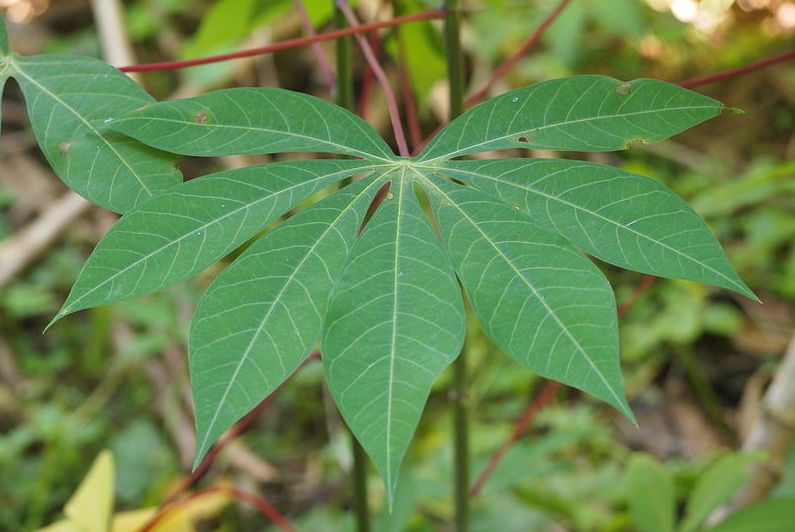

In [2]:
img= cv2.imread('CV-testing.png')
print("ORIGINAL IMAGE")
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Gray_level Image of Original Image



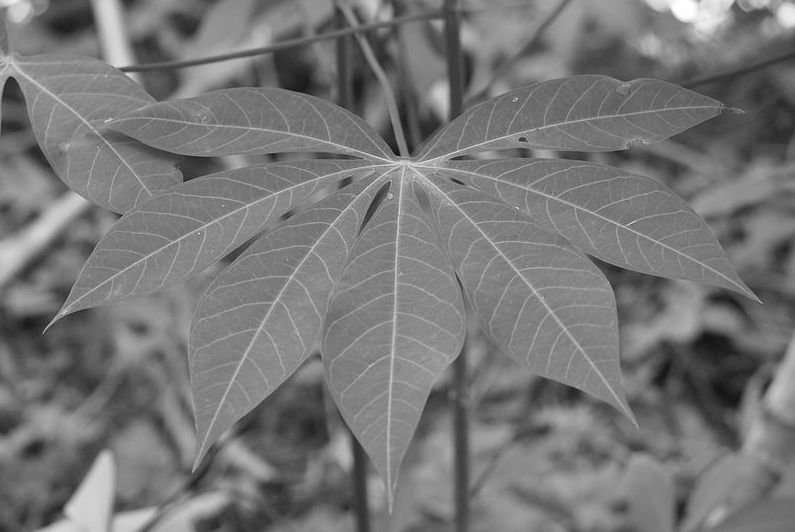

In [3]:
gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print("Gray_level Image of Original Image\n")
cv2_imshow(gray_img)

# **IMAGE ENHANCEMENT**

### *Histogram of Original Image*

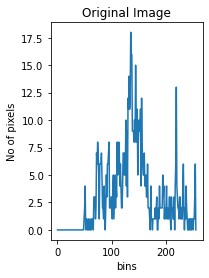

In [4]:
hist=cv2.calcHist(gray_img,[0],None,[256],[0,256])
plt.subplot(121)
plt.title("Original Image")
plt.xlabel('bins')
plt.ylabel("No of pixels")
plt.plot(hist)
plt.show()

### *Histogram of Histogram Equalized Image*

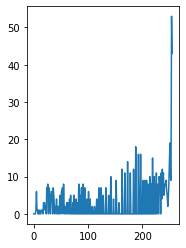

In [5]:
gray_img_eqhist=cv2.equalizeHist(gray_img)
hist=cv2.calcHist(gray_img_eqhist,[0],None,[256],[0,256])
plt.subplot(121)
plt.plot(hist)
plt.show()

Gray-level Histogram Equalized Image Output




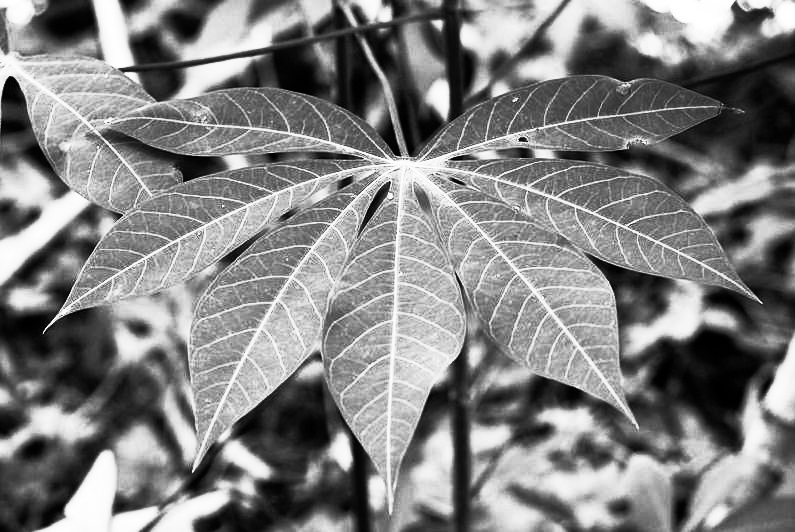

In [6]:
print("Gray-level Histogram Equalized Image Output\n\n")
cv2_imshow(gray_img_eqhist)
cv2.waitKey(0)
cv2.destroyAllWindows()

# **IMAGE SEGEMENTATION**

In [7]:
blur = cv2.blur(img,(5,5))                    #Performing Normal Blur
blur0= cv2.medianBlur(blur,5)                 #Median Blur
blur1= cv2.GaussianBlur(blur0,(5,5),0)        #Gaussian Blur
blur2= cv2.bilateralFilter(blur1,9,75,75)     #Bilateral Filter

In [8]:
hsv = cv2.cvtColor(blur2, cv2.COLOR_BGR2HSV)

In [9]:
low_blue = np.array([55, 0, 0])
high_blue = np.array([118, 255, 255])
mask = cv2.inRange(hsv, low_blue, high_blue)

After applying Mask, then Segmented image is here: 




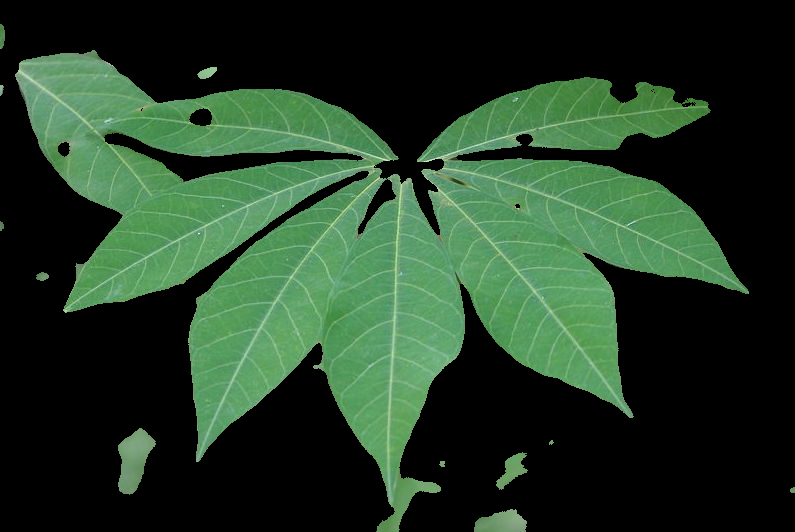

In [10]:
res = cv2.bitwise_and(img,img, mask= mask)
print("After applying Mask, then Segmented image is here: \n\n")
cv2_imshow(res)

# **FEATURE EXTRACTION**

HSV image: 




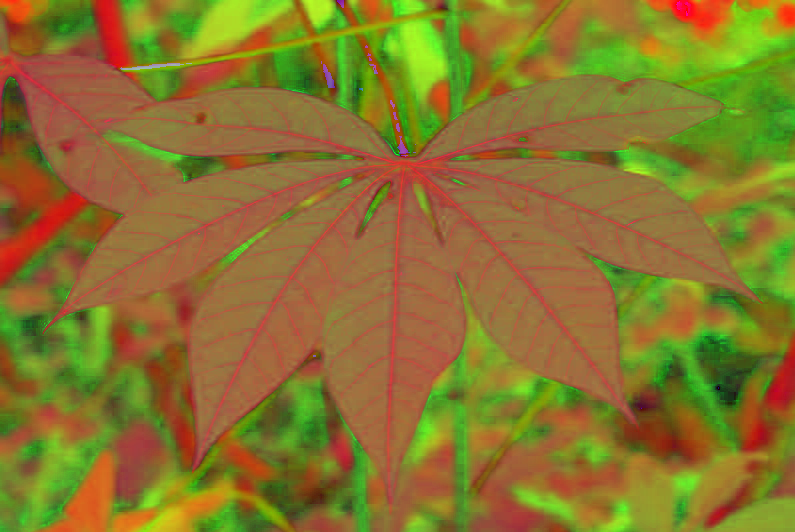

In [11]:
#converting image to HSV format
hsv_image_load = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
 
#printing HSV image
print("HSV image: \n\n")
cv2_imshow(hsv_image_load)

Original Image


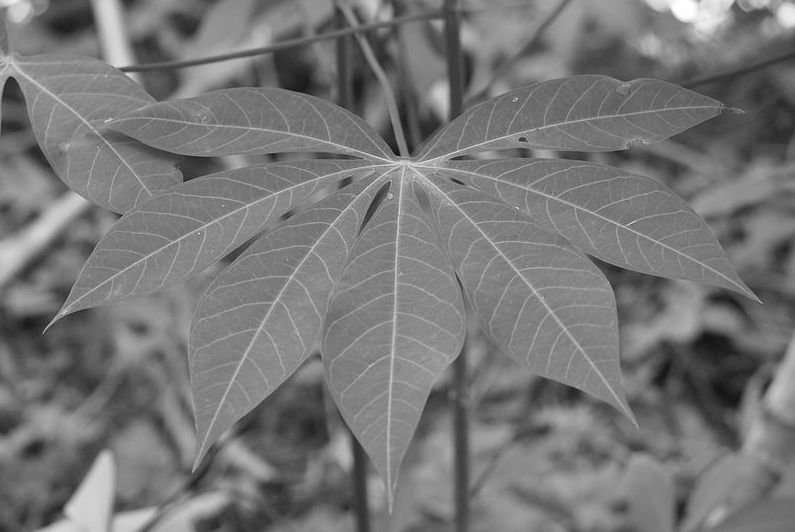




BINARY


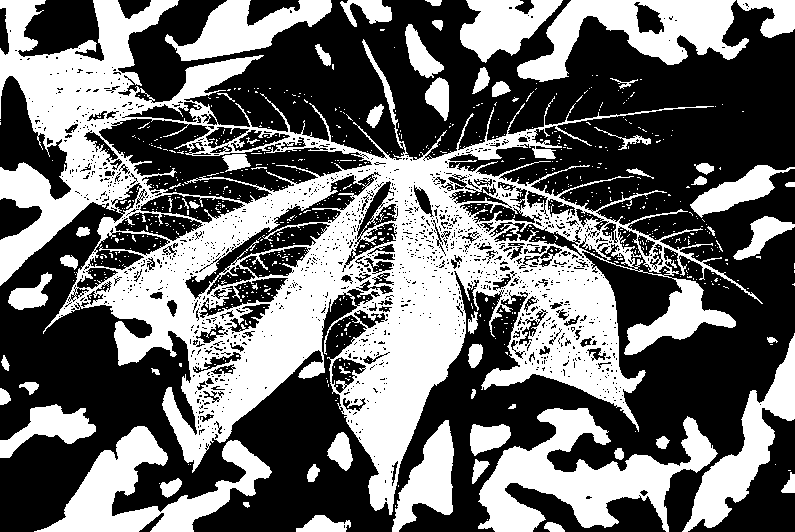




THRESH_BINARY


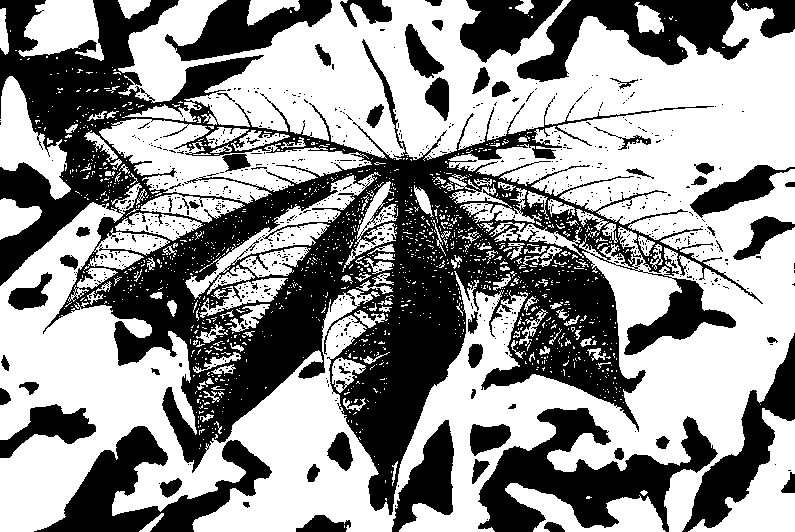




THRESH_TRUNC


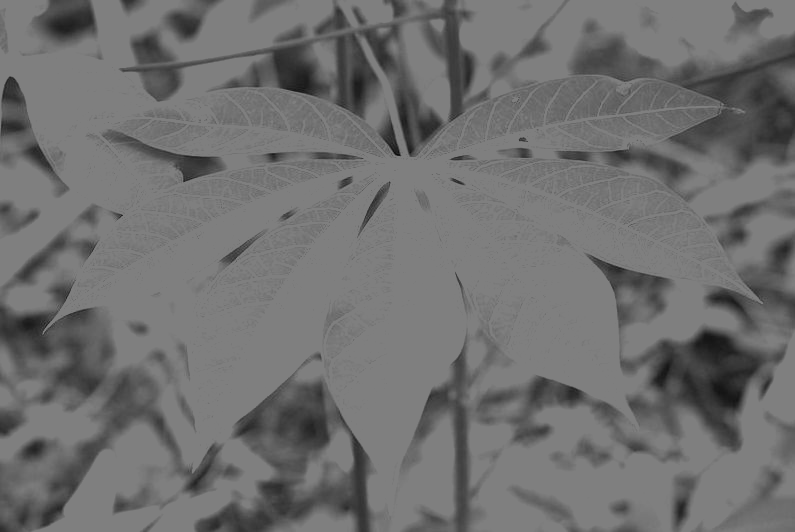




THRESH_TOZERO


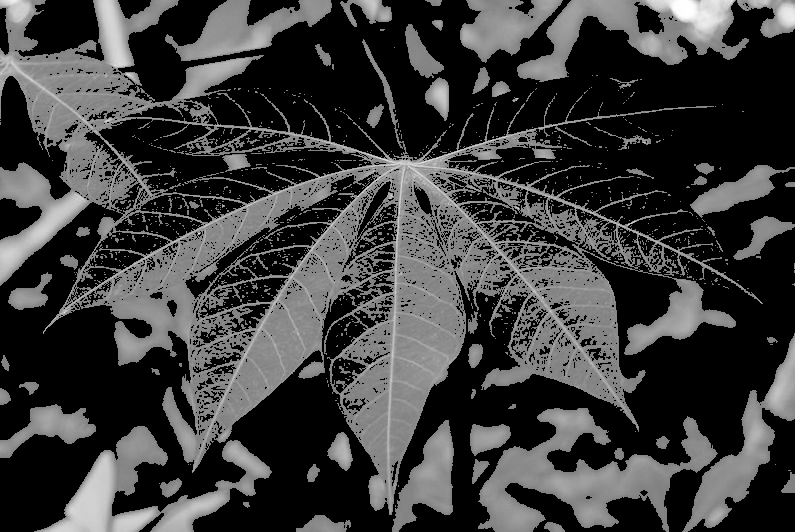




THRESH_TOZERO_INV


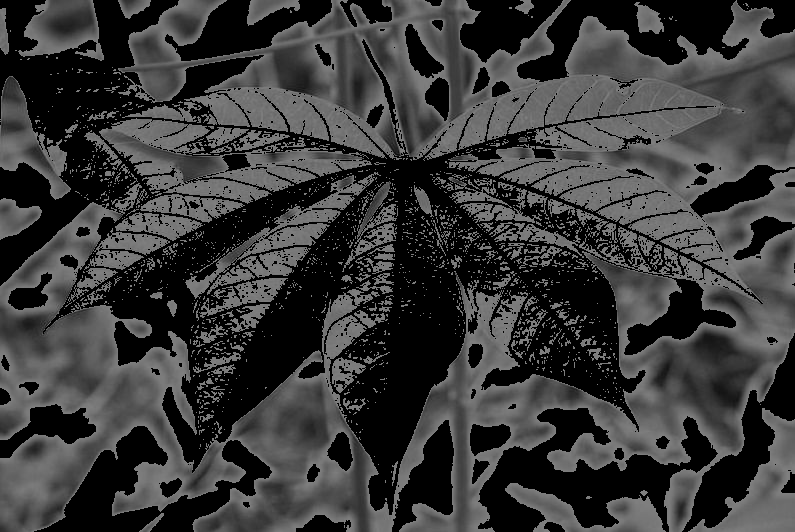

In [12]:
ret,thresh_binary = cv2.threshold(gray_img,127,255,cv2.THRESH_BINARY)
 
ret,thresh_binary_inv = cv2.threshold(gray_img,127,255,cv2.THRESH_BINARY_INV)
 
ret,thresh_trunc = cv2.threshold(gray_img,127,255,cv2.THRESH_TRUNC)
 
ret,thresh_tozero = cv2.threshold(gray_img,127,255,cv2.THRESH_TOZERO)
 
ret,thresh_tozero_inv = cv2.threshold(gray_img,127,255,cv2.THRESH_TOZERO_INV)
#DISPLAYING THE DIFFERENT THRESHOLDING STYLES using OpenCV
 
names = ['Original Image','BINARY','THRESH_BINARY','THRESH_TRUNC','THRESH_TOZERO','THRESH_TOZERO_INV']
 
images = gray_img,thresh_binary,thresh_binary_inv,thresh_trunc,thresh_tozero,thresh_tozero_inv
 
for i in range(len(images)):
  print(names[i], end = "\n")
  cv2_imshow(images[i])
  print("\n\n")

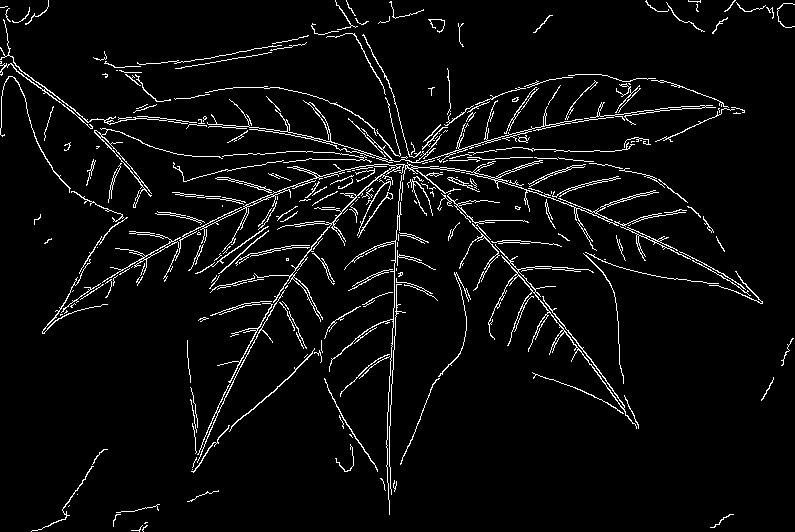

In [13]:
#Finding the edges using Canny edge algorithm
edges_of_image = cv2.Canny(img,100,200) 
 
#plot the edges
cv2_imshow(edges_of_image)

*Here, we tried to use SIFT feature but unfortunately, it is not present in opencv by default (“non-free” modules)*

*This code source* - *GFG*

In [14]:
# Important NOTE: Use opencv <= 3.4.2.16 as
# SIFT is no longer available in
# opencv > 3.4.2.16

# Converting image to grayscale

# Applying SIFT detector
sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(gray, None)

# Marking the keypoint on the image using circles
img=cv2.drawKeypoints(gray_img ,
					kp ,
					img ,
					flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2_imshow(img)


error: ignored